In [ ]:
!pip install pandas numpy matplotlib

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
titanic = pd.read_csv("C:\\Users\\brand\\Downloads\\Titanic.csv")

In [4]:
titanic.head()

,Identificador,Sobreviviente,Clase,Nombre,Sexo,Edad,Tarifa,Camarote
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN


# Cambios iniciales

In [6]:
# Rellena los valores ‘NaN’ de la columna ‘Age’ con la media de las edades
titanic['Edad'] = titanic['Edad'].fillna(titanic['Edad'].mean())

In [8]:
# Cambia los datos de la columna ‘Sexo’ a datos numéricos: 0 si es hombre, 1 si es mujer.
# we got male and female values in the column
sex_values = {
    'male': 0,
    'female': 1
}

titanic['Sexo'] = titanic['Sexo'].replace(sex_values)

C:\Users\brand\AppData\Local\Temp\ipykernel_27400\1464030881.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Sexo'] = titanic['Sexo'].replace(sex_values)


In [9]:
titanic.head()

,Identificador,Sobreviviente,Clase,Nombre,Sexo,Edad,Tarifa,Camarote
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,NaN


# Preguntas iniciales

In [15]:
# ¿Cuál es la edad promedio de los sobrevivientes? ¿Y de las mujeres? ¿Y de los hombres?
# It means we have to coindition the data by the column 'Sobreviviente' = 1
survivors = titanic[titanic['Sobreviviente'] == 1]
survivors_mean_age = survivors['Edad'].mean()
male_survivors_mean_age = survivors[survivors['Sexo'] == 0]['Edad'].mean()
female_survivors_mean_age = survivors[survivors['Sexo'] == 1]['Edad'].mean()

print(f"Edad promedio de los sobrevivientes: {survivors_mean_age}")
print(f"Edad promedio de los hombres sobrevivientes: {male_survivors_mean_age}")
print(f"Edad promedio de las mujeres sobrevivientes: {female_survivors_mean_age}")

Edad promedio de los sobrevivientes: 28.549778121775027
Edad promedio de los hombres sobrevivientes: 27.63170534268753
Edad promedio de las mujeres sobrevivientes: 28.979262812421105


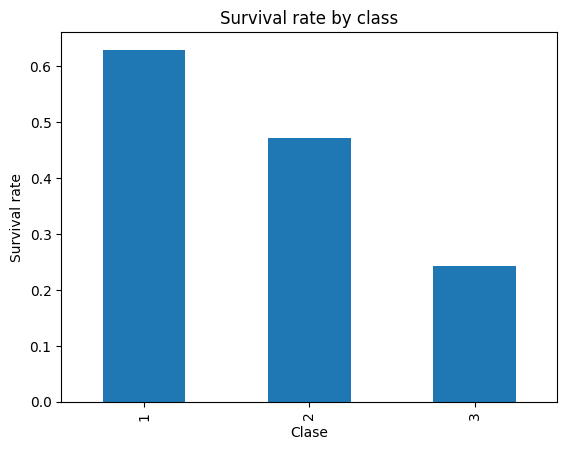

In [18]:
# Presenta una gráfica en donde se pueda visualizar el índice de sobreviviencia y la clase. ¿Qué puedes inferir a partir de esta información?
# We can use a bar chart to show the survival rate by class
survival_rate_by_class = titanic.groupby('Clase')['Sobreviviente'].mean()
survival_rate_by_class.plot(kind='bar')
plt.ylabel('Survival rate')
plt.title('Survival rate by class')
plt.show()


In [24]:
# ¿Qué condiciones favorecieron más a la sobrevivencia? Explica tu respuesta.
# To answer this question we can calculate the correlation between the columns
titanic_without_name = titanic.drop(columns=['Nombre', 'Camarote'])
correlation = titanic_without_name.corr()
correlation['Sobreviviente'].sort_values(ascending=False)

# The correlation between the columns and the survival rate shows that the most important factor was
# Sex, followed by the fare and the class.

Sobreviviente    1.000000
Sexo             0.543351
Tarifa           0.257307
Identificador   -0.005007
Edad            -0.069809
Clase           -0.338481
Name: Sobreviviente, dtype: float64